In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from oetils import init_plotting

In [2]:
W = init_plotting(latex=True, sans=True)

In [3]:
g = 9.81  # Acceleration of gravity [m/s^2]
data = pd.DataFrame({
    'µ': [0.0260, 0.0260, 0.0374, 0.0374, 0.0482],  # Linear mass density [g / cm]
    'M': [559., 249., 365., 207., 262.],            # Mass of tension inducing weight [g]
    'd': [48.1, 31.9, 32.0, 24.2, 23.8]             # Distance between nodes [cm]
})

# Convert to SI
data['µ'] /= 1000 / 100
data['M'] /= 1000
data['d'] /= 100

data

,µ,M,d
0,0.00260,0.559,0.481
1,0.00260,0.249,0.319
2,0.00374,0.365,0.320
3,0.00374,0.207,0.242
4,0.00482,0.262,0.238


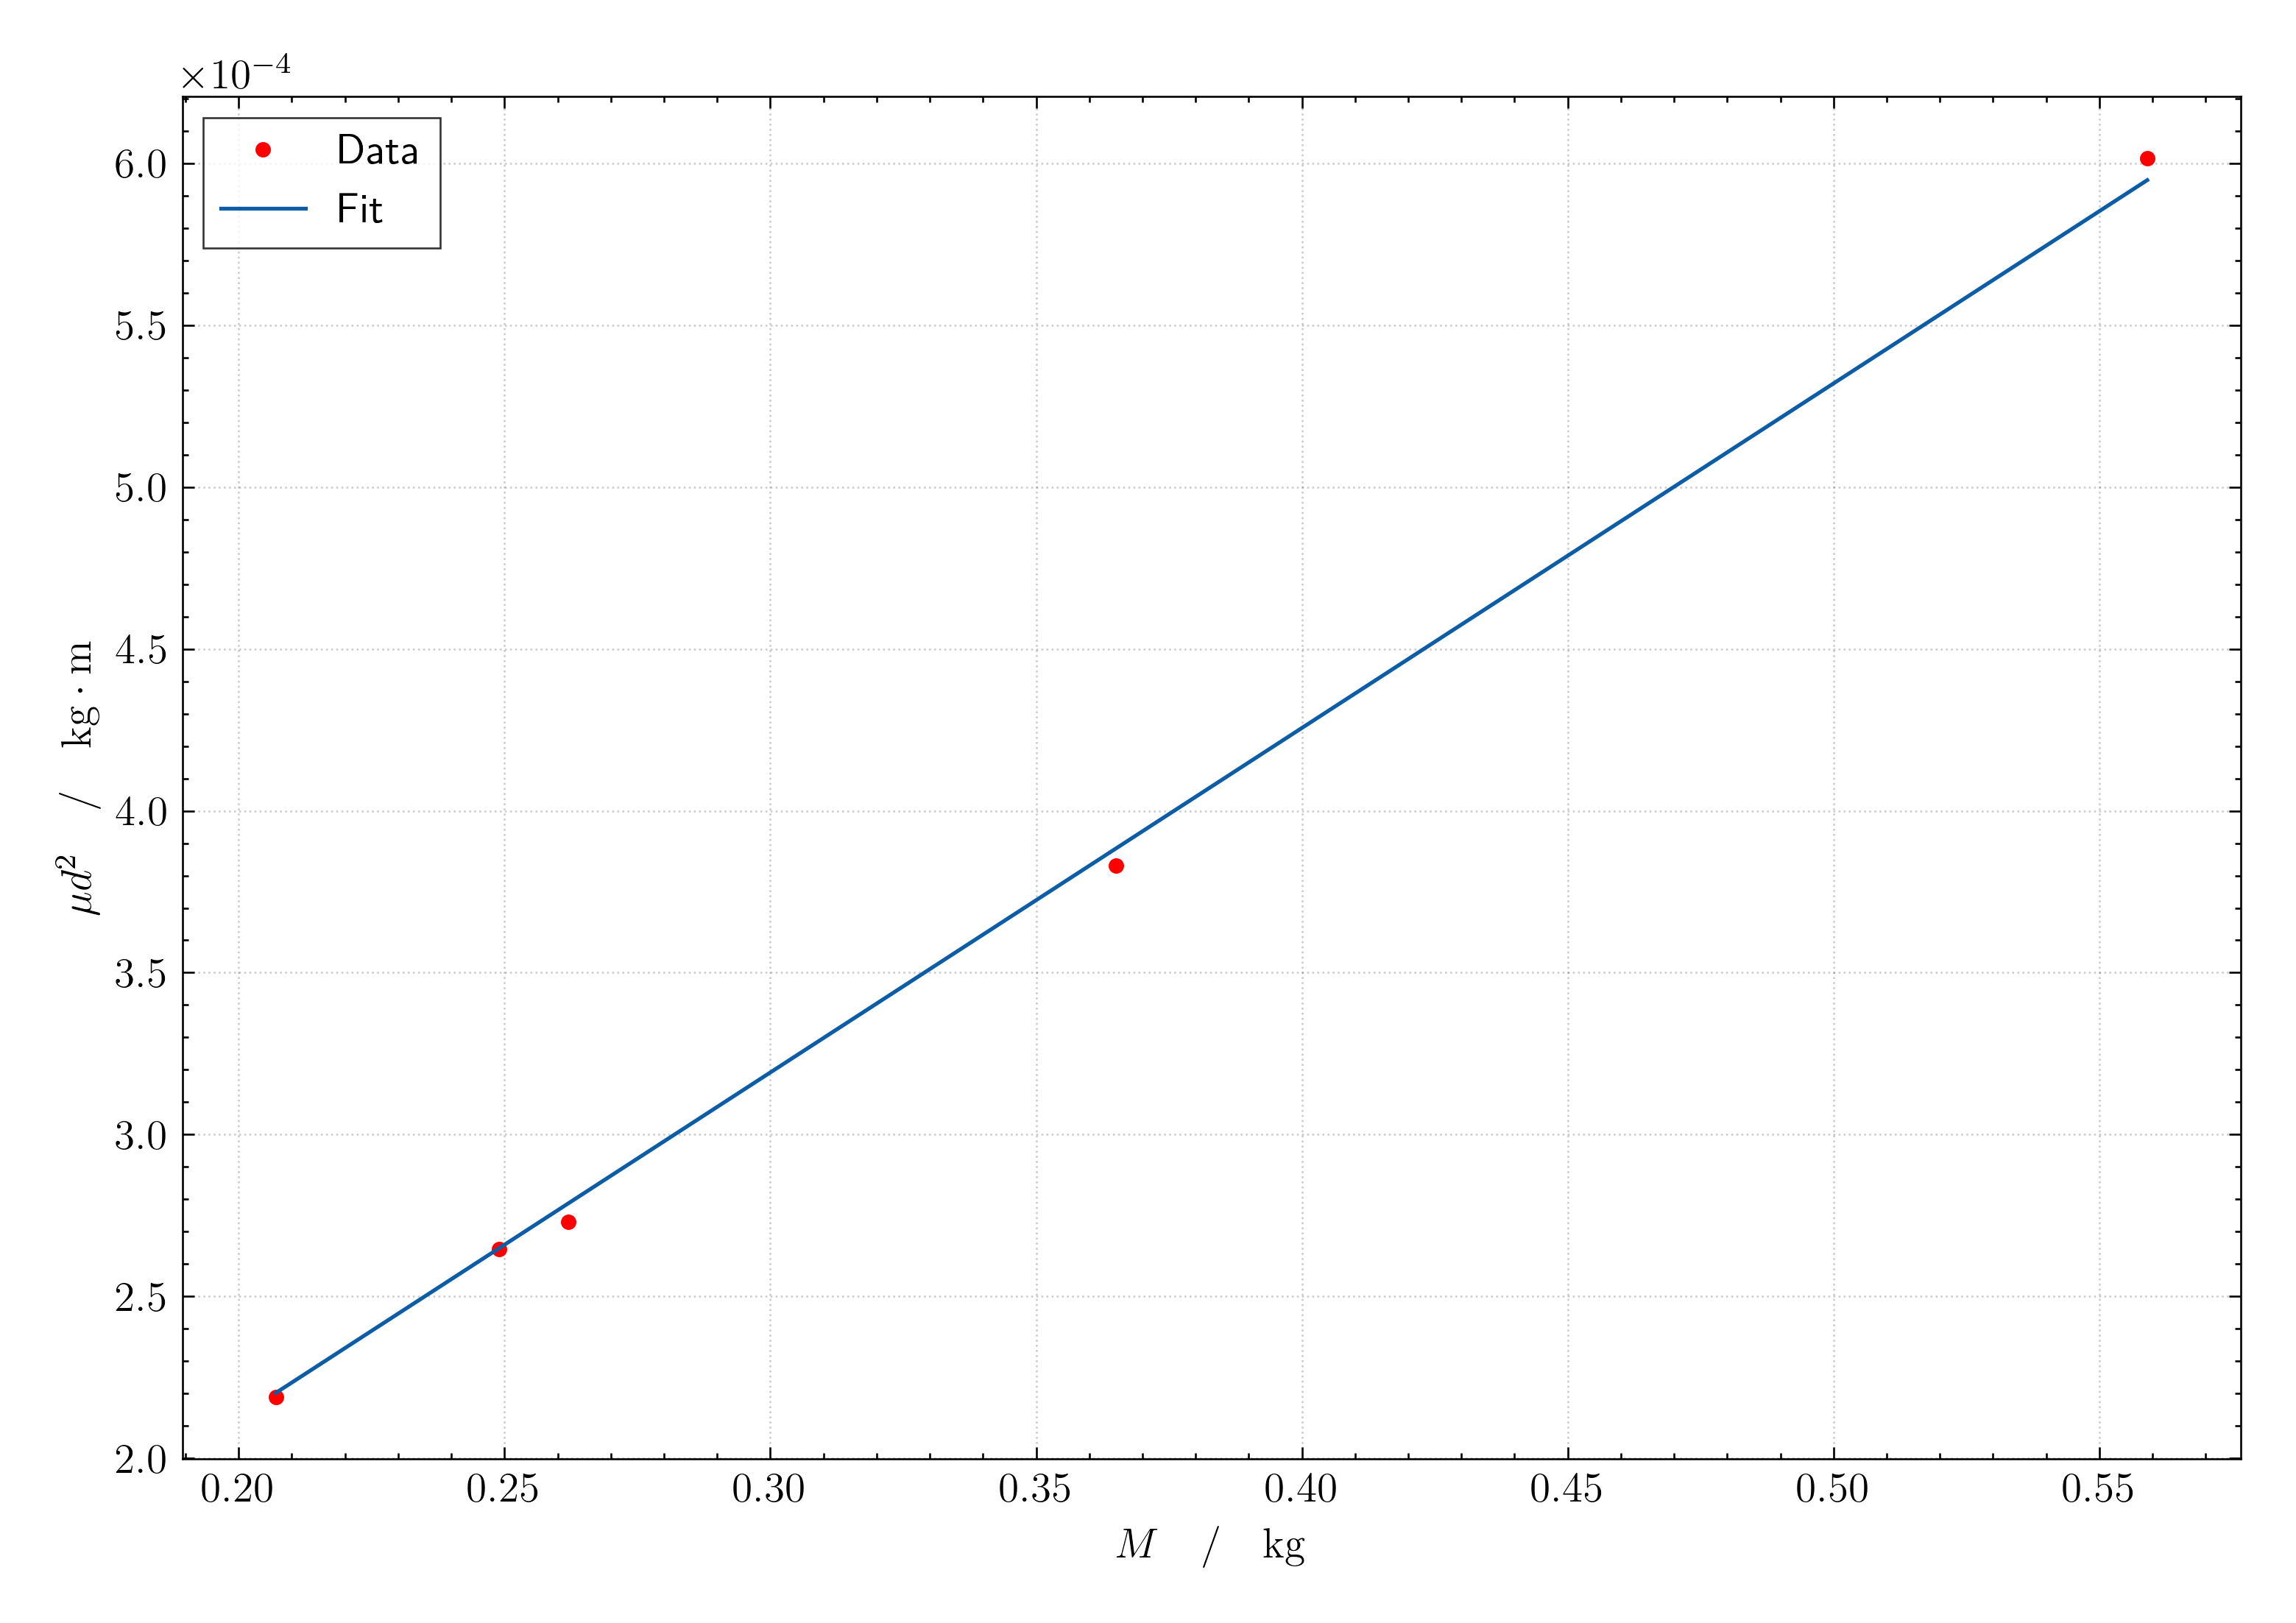

In [4]:
# Least squares fit
x = data.M.values[:, None]
y = data['µ'] * data.d**2
w = np.linalg.lstsq(x, y)[0][0]

# Plot
fig, ax = plt.subplots()
ax.set_xlabel(r"$M\quad/\quad\mathrm{kg}$")
ax.set_ylabel(r"$\mu d^2\quad/\quad\mathrm{kg\cdot m}$")
ax.plot(data.M, y, 'r.', label="Data")
x = np.linspace(data.M.min(), data.M.max())
ax.plot(x, w * x, label="Fit")
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.legend()
plt.show()

In [5]:
f = 1/2 * np.sqrt(g / w)
print(f"The oscillator has a frequency of f = {f:.1f} Hz.")

The oscillator has a frequency of f = 48.0 Hz.


In [6]:
mu = 0.0260 / (1000 / 100)
d = 24.0 / 100
M = 4 * f**2 * mu * d**2 / g * 1000
print(f"For string A, the desired wavelength is achieved by a mass of M = {M:.0f} g.")

For string A, the desired wavelength is achieved by a mass of M = 141 g.
